#### Libraries Needed

In [1]:
import os
import numpy as np
import scipy as sp
import scipy.io.wavfile as wf

import datetime

import matplotlib.pyplot as plt

In [2]:
# main folder path
os.chdir('../')
# matplotlib
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
# Own Library
import ppfunctions_1 as ppf

#### Data Loading

In [4]:
# Looking for heart sounds data absolute path 
l1 = os.path.abspath('database/noche/n202106090212.wav')

# reading file
sf, sound = wf.read(l1)
# sound time 
stime = str(datetime.timedelta(seconds=len(sound)/sf))
print(f'Sound duration: {stime} seconds')

Sound duration: 3:02:23.640000 seconds


Let's take 1 minute of the sound

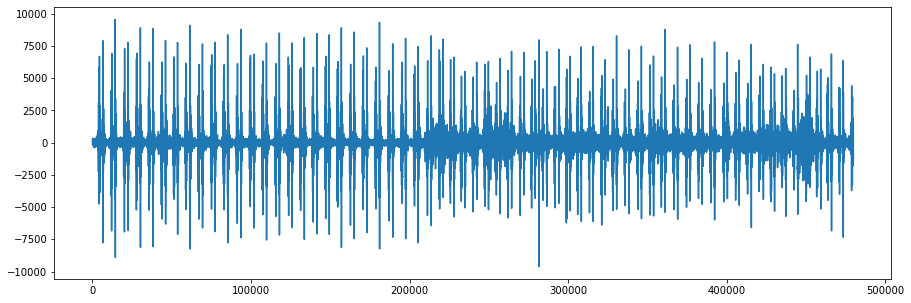

In [5]:
sample = sound[0:60*sf]

plt.plot(sample)

In [6]:
# peak detection
peaks = ppf.findpeaks(data = sample, limit = 0.35, spacing = int(sf/2))
# finds peaks position in sample
peaks_values = sample[peaks]
# time when the peak happened
peak_time = peaks * 1/sf
# peak interval
peak_interval = np.diff(peak_time)
# beats per minute
bpm = 60/peak_interval

peakv = np.zeros(len(sample))
for i, p in enumerate(peaks):
    peakv[p] = peaks_values[i]

# vector time
vt = np.arange(len(sample)) * 1/sf

Text(0.5, 0, 'Time (sec)')

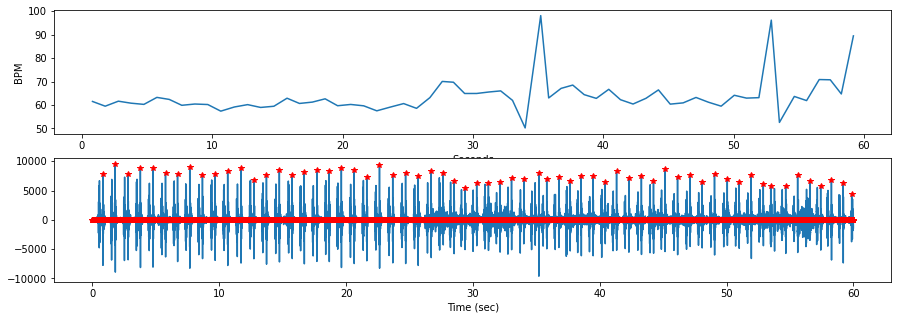

In [7]:
plt.subplot(2,1,1)
plt.plot(peak_time[:-1], bpm)
plt.ylabel('BPM')
plt.xlabel('Seconds')
plt.subplot(2,1,2)
plt.plot(vt, sample)
plt.plot(vt, peakv, 'r*')
plt.xlabel('Time (sec)')

In [8]:
gain = 1
#   mean
mean_RR = np.mean(peaks_values/sf*1000)
mean_Peaks = np.mean(peaks_values*gain)

#   median
median_RR = np.median(peaks_values/sf*1000)
median_Peaks = np.median(peaks_values*gain)

#   standard deviation
std_RR = np.std(peaks_values/sf*1000)
std_Peaks = np.std(peaks_values*gain)

#   variance
var_RR = sp.stats.tvar(peaks_values/sf*1000)
var_Peaks = sp.stats.tvar(peaks_values*gain)

#   Skewness
skew_RR = sp.stats.skew(peaks_values/sf*1000)
skew_Peaks = sp.stats.skew(peaks_values*gain)

#   Kurtosis
kurt_RR = sp.stats.kurtosis(peaks_values/sf*1000)
kurt_Peaks = sp.stats.kurtosis(peaks_values*gain)

In [9]:
print(f'mean peak: {mean_RR}\nmedian peak: {median_RR}')

mean peak: 931.5039682539683
median peak: 948.5
